#  Sentiment Analysis on Movie Reviews

The goal of sentiment analysis is to determine the attitude or emotional tone of a piece of text, whether it is positive, negative, or neutral.

![Analysis logo](https://contenthub-static.grammarly.com/blog/wp-content/uploads/2018/03/how-to-write-movie-review.jpg)

1. Sai vineeth, Akula - 1002028631


In [1]:
# Import Statements

# Import numpy for numerical analysis
import numpy as np 

# Import pandas to store and process in a dataframe
import pandas as pd 

# Import re for regular expressions
#import re

# Import nltk to perform natural language processing tasks
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')


# for ploting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# For Lemmatize the dataset
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix
# For encoding values
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, SimpleRNN, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saivineeth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/saivineeth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/saivineeth/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/saivineeth/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


In [2]:
# Read csv file into a dataframe

# Note: Make sure the csv file is in same location as the file

df = pd.read_csv('movie.csv')
df.head(10)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
5,A terrible movie as everyone has said. What ma...,0
6,Finally watched this shocking movie last night...,1
7,I caught this film on AZN on cable. It sounded...,0
8,It may be the remake of 1987 Autumn's Tale aft...,1
9,My Super Ex Girlfriend turned out to be a plea...,1


In [3]:
#Check if any null values 
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

Series([], dtype: int64)


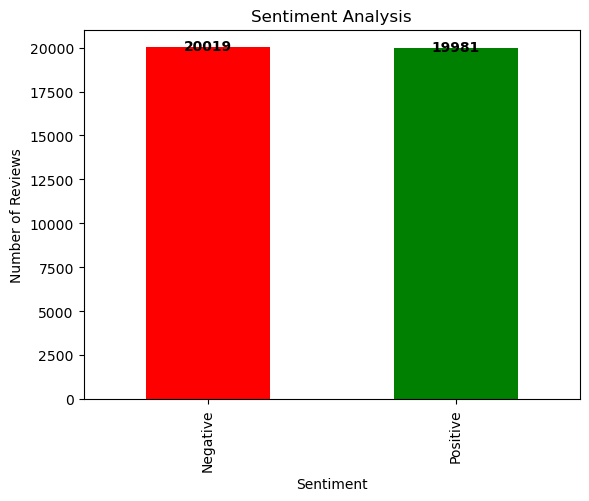

In [4]:
# Count the number of positive and negative reviews
review_counts = df['label'].value_counts()

# Rename the index of review_counts to 'Negative' and 'Positive'
review_counts.index = ['Negative', 'Positive']

# Plot a bar chart
ax = review_counts.plot(kind='bar', color=['red', 'green'])

# Set the title and labels
ax.set_title('Sentiment Analysis')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Reviews')

# Add labels to the bars
for i, count in enumerate(review_counts):
    ax.text(i, count+50, str(count), ha='center', va='center', fontweight='bold')

# Show the plot
plt.show()

In [5]:
# Convert all the values in the overview column to lower

df['text'] = df['text'].str.lower()

In [6]:
import string

# Define a function to remove punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Apply the function to the 'Overview' column
df['text'] = df['text'].apply(remove_punctuations)

### Remove Stopwords
remove_stopwords takes a text string and a list of stopwords as input, and returns the text string with all the stopwords removed.

The code then applies the remove_stopwords function to each row of the 'text' column in the pandas DataFrame 'df', using a for loop and the df.index attribute. The result of the function is assigned back to the 'text' column in the same row of the DataFrame.

The purpose of this code is to remove common words that are not useful for the task at hand, such as articles, prepositions, and conjunctions, from the text data in the 'text' column of the DataFrame 'df'. This can improve the quality of the text data for downstream natural language processing tasks, such as sentiment analysis or topic modeling.

In [7]:
# Remove Stopwords from each row of the review column

def remove_stopwords(text, stopwords):
    result = []
    for each in text.split():
        if each not in stopwords:
            result.append(each.strip())
    return " ".join(result)

stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
             "youre", 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 
             'yourselves', 'he', 'him', 'his', 'himself', 'she', "shes", 'her', 
             'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 
             'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 
             'this', 'that', "thatll", 'these', 'those', 'am', 'is', 'are', 'was', 
             'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 
             'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 
             'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 
             'about', 'against', 'between', 'into', 'through', 'during', 'before', 
             'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 
             'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there',
             'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 
             'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same',
             'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', "dont", 
             "shouldve", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', "arent", 
             "couldnt", "didnt", "doesnt", "hadnt", "hasnt", "havent", "isnt", 'ma', 
             "mightnt", "mustnt", "neednt",  "shant", "shouldnt",  "wasnt",  "werent", 
             'won', "wont",  "wouldnt"] #stopwords list

for index in df.index:
    df.loc[index, 'text'] = remove_stopwords(df.loc[index, 'text'], stopwords)



### lemmitizer_text

lemmitizer_text which takes a string of text data as input and applies lemmatization to it. Specifically, it uses the WordNetLemmatizer from the NLTK library to convert each word in the text to its base or dictionary form (i.e., the lemma).

The code then applies the lemmitizer_text function to each row of the 'text' column in the pandas DataFrame 'df', using the apply method with a lambda function. The result of the function is assigned back to the 'text' column in the same row of the DataFrame.

The purpose of this code is to further preprocess the text data in the 'text' column of the DataFrame 'df' by reducing each word to its base form. This can help to normalize the text data and reduce the number of unique words in the corpus, making it easier to analyze or model.

In [8]:
# Lemmitize each row of the review column


def lemmitizer_text(data):
    lemmatizer = WordNetLemmatizer()
    result = ""
    for words in data:
        result += lemmatizer.lemmatize(words)
    return result

df['text'] = df['text'].apply(lambda z: lemmitizer_text(z))


In [9]:
df.head(10)

,text,label
0,grew b 1965 watching loving thunderbirds mates...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1
5,terrible movie everyone said made laugh cameo ...,0
6,finally watched shocking movie last night dist...,1
7,caught film azn cable sounded like would good ...,0
8,may remake 1987 autumns tale eleven years dire...,1
9,super ex girlfriend turned pleasant surprise r...,1


In [10]:
# Get the container of Labels
labels = np.array([label for label in df['label']])

# Get the container of Overviews
Overview = np.array([Overview for Overview in df['text']])

In [11]:
# Splitting into train and test
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Train dataset
X_train, y_train = train['text'], train['label']

# Test dataset
X_test, y_test = test['text'], test['label']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(32000,) (32000,)
(8000,) (8000,)


### Vectorizing
In the code, vect is an instance of the TfidfVectorizer class, which is fit to the training data using the fit_transform method. The resulting vectorized training data is stored in X_train_vect. The transform method is then applied to the test data, producing the vectorized test data stored in X_test_vect.

The CountVectorizer, on the other hand, simply counts the frequency of each token in the documents and represents them as a matrix of token counts. It can be used for a variety of text processing tasks, including feature extraction and modeling.

In the code, count_vect is an instance of the CountVectorizer class, which is fit to the training data using the fit_transform method. The resulting vectorized training data is stored in X_train_count. The transform method is then applied to the test data, producing the vectorized test data stored in X_test_count.

Both of these methods convert the text data into a matrix representation that can be used for machine learning tasks, such as text classification or clustering. The choice between the two methods depends on the specific task and the nature of the text data being processed.

In [12]:
# Tfidf - Term Frequency - Inverse Document Frequency
vect = TfidfVectorizer()
X_train_vect= vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

# It converts a collection of text documents to a matrix of token counts.
count_vect = CountVectorizer() 
X_train_count = count_vect.fit_transform(X_train)
X_test_count = count_vect.transform(X_test)

### Tokenizing 
This code sets the maximum number of words to keep in the tokenizer to 20,000, and then creates a tokenizer using the Tokenizer class from the tensorflow.keras.preprocessing.text module. The tokenizer is fitted on the training data using the fit_on_texts method, which generates a word index based on the frequency of each word in the training data. The resulting word_index is a dictionary where each word is a key and the corresponding value is an integer index. Finally, the length of the word_index dictionary is stored in the variable len_word_index. This code is often used for text preprocessing in natural language processing (NLP) tasks such as text classification or sentiment analysis.

In [13]:
#Using tokenizer function
#Method fit_on_texts train the tokenizer
#Method texts_to_sequences converts sentenses to their numeric form
maxlen = 20000
word_tokenizer = Tokenizer(num_words = maxlen, oov_token="<oov>")
word_tokenizer.fit_on_texts(X_train)
word_index = word_tokenizer.word_index
len_word_index = len(word_index)


This code is converting the text data in X_train and X_test to sequences using the previously fitted word tokenizer.

In [14]:
# Convert text to sequences
X_seq_train = word_tokenizer.texts_to_sequences(X_train)
X_seq_test = word_tokenizer.texts_to_sequences(X_test)

In [15]:
#choice of maximum length of sequences
seq_len_list = [len(i) for i in X_seq_train + X_seq_test]
max_len = max(seq_len_list)
print('Maximum length of sequence in the list: ', str(max_len))

Maximum length of sequence in the list:  1440



This code sets the maximum length of the sequence by calculating the average length of all sequences in seq_len_list and adding two times the standard deviation to it. This ensures that sequences that are much longer than the average are not truncated, while sequences that are much shorter than the average are not padded unnecessarily. The resulting value is stored in max_seq_len.

In [16]:
# When setting the max length of sequence, variability around the avg is used.
max_seq_len = int(np.mean(seq_len_list) + 2 * np.std(seq_len_list))
print('Max length of the sequence when considering data only 2 std from avg: ', str(max_seq_len))

Max length of the sequence when considering data only 2 std from avg:  305


### Padding
This code pads the sequences of text data with zeros to make all sequences have the same length, which is specified by max_seq_len. The pad_sequences function from Keras is used, which takes the sequences as input and pads or truncates them based on the specified length. Padding is added at the beginning of the sequence, meaning that the zeros are added at the beginning of the sequence to make its length equal to max_seq_len. If the sequence is longer than max_seq_len, then it is truncated to max_seq_len length. The padded and truncated sequences are saved in X_pad_train and X_pad_test.

In [17]:
# Pad the sequences so they all have the same length
X_pad_train = pad_sequences(X_seq_train, maxlen=max_seq_len)
X_pad_test = pad_sequences(X_seq_test, maxlen=max_seq_len)

In [18]:
# Splitting training set for validation purposes
X_train, X_val, y_train, y_val = train_test_split(X_pad_train, y_train, test_size=0.2,random_state=10)


## LSTM


It uses an embedding layer, a convolutional layer, a max pooling layer, an LSTM layer, batch normalization, and a dense layer with a sigmoid activation function. The model is compiled with binary cross-entropy loss and the Adam optimizer, and accuracy is used as a metric.

The code trains the model for a specified number of epochs and batch size, using a portion of the training data for validation. The training history is saved in the history variable.

In [19]:
#LSTM
embedding_size = 32
model = Sequential()
model.add(Embedding(len_word_index + 1, embedding_size, input_length=max_seq_len))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Train and evaluate our model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 32
num_epochs = 10
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
history = model.fit(X_train2, y_train2, validation_data = (X_valid, y_valid), 
         batch_size = batch_size, epochs = num_epochs)


Epoch 1/10


2023-04-29 21:23:53.597237: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


799/799 [==============================] - 50s 62ms/step - loss: 0.3625 - accuracy: 0.8377 - val_loss: 0.3053 - val_accuracy: 0.8125
Epoch 2/10
799/799 [==============================] - 49s 62ms/step - loss: 0.1716 - accuracy: 0.9338 - val_loss: 0.4807 - val_accuracy: 0.8750
Epoch 3/10
799/799 [==============================] - 49s 62ms/step - loss: 0.0687 - accuracy: 0.9748 - val_loss: 0.1670 - val_accuracy: 0.9375
Epoch 4/10
799/799 [==============================] - 50s 63ms/step - loss: 0.0463 - accuracy: 0.9828 - val_loss: 1.1618 - val_accuracy: 0.8438
Epoch 5/10
799/799 [==============================] - 50s 62ms/step - loss: 0.0340 - accuracy: 0.9880 - val_loss: 0.2763 - val_accuracy: 0.9062
Epoch 6/10
799/799 [==============================] - 50s 62ms/step - loss: 0.0234 - accuracy: 0.9925 - val_loss: 0.2270 - val_accuracy: 0.8438
Epoch 7/10
799/799 [==============================] - 49s 61ms/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.4146 - val_accuracy: 0.8438
Epo

In [20]:
# Evaluate the model
loss, accuracy = model.evaluate(X_pad_test, y_test)
print('Accuracy:', accuracy)

250/250 [==============================] - 4s 15ms/step - loss: 0.6445 - accuracy: 0.8499
Accuracy: 0.8498749732971191


250/250 [==============================] - 4s 15ms/step


([<matplotlib.axis.YTick at 0x307619180>,
 [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

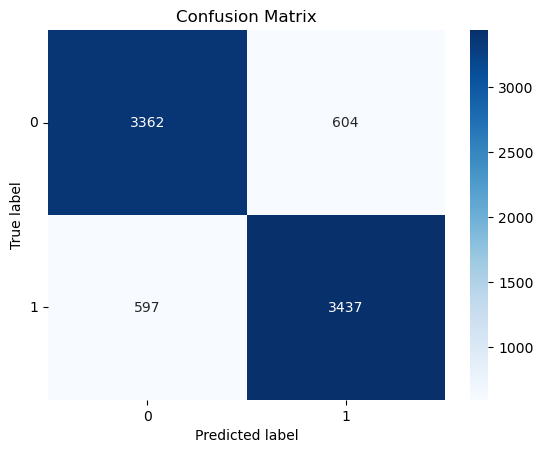

In [21]:
y_pred = model.predict(X_pad_test)
y_pred_binary = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_binary)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.xticks([0.5, 1.5], ['0', '1'])
plt.yticks([0.5, 1.5], ['0', '1'], rotation=0)




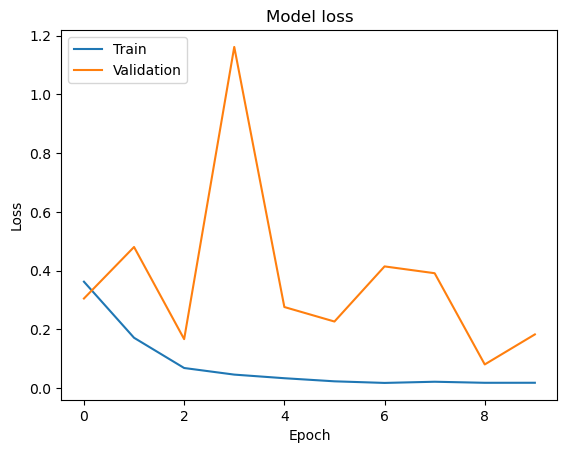

In [22]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## RNN

The architecture includes an Embedding layer to map words to vectors, followed by a 1D Convolutional layer, MaxPooling layer, and a Simple RNN layer. Batch Normalization is also applied to reduce overfitting. The model is compiled with the 'rmsprop' optimizer and binary cross-entropy loss. Early stopping is used to prevent overfitting. The model is trained on the training data and validated on a subset of it. The training history is stored in a variable 'history' for later analysis.

In [23]:
# Define the RNN model architecture
embedding_size = 32
model = Sequential()
model.add(Embedding(len_word_index+1, embedding_size, input_length=max_seq_len))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(SimpleRNN(32))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
1280/1280 [==============================] - 15s 11ms/step - loss: 0.4838 - accuracy: 0.7508 - val_loss: 0.3177 - val_accuracy: 0.8623
Epoch 2/10
1280/1280 [==============================] - 14s 11ms/step - loss: 0.3354 - accuracy: 0.8542 - val_loss: 0.5627 - val_accuracy: 0.7635
Epoch 3/10
1280/1280 [==============================] - 15s 11ms/step - loss: 0.2528 - accuracy: 0.8986 - val_loss: 0.3371 - val_accuracy: 0.8533
Epoch 4/10
1280/1280 [==============================] - 20s 15ms/step - loss: 0.1606 - accuracy: 0.9406 - val_loss: 0.4045 - val_accuracy: 0.8480


In [24]:
# Evaluate the model
loss, accuracy = model.evaluate(X_pad_test, y_test)
print('Accuracy:', accuracy)

250/250 [==============================] - 1s 4ms/step - loss: 0.4353 - accuracy: 0.8416
Accuracy: 0.8416249752044678


250/250 [==============================] - 1s 3ms/step


([<matplotlib.axis.YTick at 0x104ebc220>,
 [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

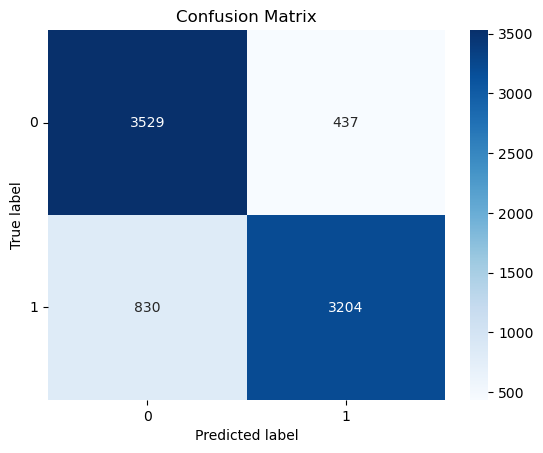

In [25]:
y_pred = model.predict(X_pad_test)
y_pred_binary = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_binary)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.xticks([0.5, 1.5], ['0', '1'])
plt.yticks([0.5, 1.5], ['0', '1'], rotation=0)

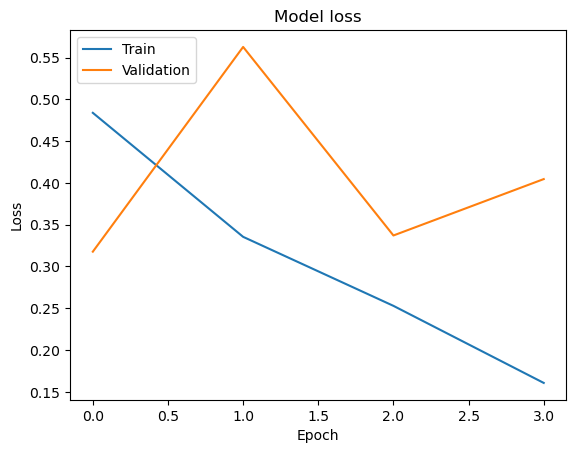

In [26]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## CNN

The model includes an embedding layer, a 1D convolutional layer with 256 filters and kernel size of 3, followed by batch normalization, max-pooling, flatten, and two dense layers with 256 and 1 units respectively. The model is compiled with binary cross-entropy loss and Adam optimizer, and accuracy is used as the evaluation metric. The model is trained for 10 epochs with a batch size of 64 and validated on a small subset of the training data. Finally, the model is evaluated on the test data and the test accuracy is printed

In [27]:
embedding_size = 32
model = Sequential()
model.add(Embedding(len_word_index+1, embedding_size, input_length=max_seq_len))
model.add(Conv1D(256, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [28]:
# Train and evaluate our model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [29]:
batch_size = 64
num_epochs = 10
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
history = model.fit(X_train2, y_train2, validation_data = (X_valid, y_valid), 
         batch_size = batch_size, epochs = num_epochs)

Epoch 1/10
399/399 [==============================] - 42s 103ms/step - loss: 0.4187 - accuracy: 0.7947 - val_loss: 0.3932 - val_accuracy: 0.9375
Epoch 2/10
399/399 [==============================] - 32s 79ms/step - loss: 0.1278 - accuracy: 0.9527 - val_loss: 0.2563 - val_accuracy: 0.8906
Epoch 3/10
399/399 [==============================] - 31s 77ms/step - loss: 0.0414 - accuracy: 0.9853 - val_loss: 0.4433 - val_accuracy: 0.8438
Epoch 4/10
399/399 [==============================] - 33s 82ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.3972 - val_accuracy: 0.9375
Epoch 5/10
399/399 [==============================] - 32s 81ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.3293 - val_accuracy: 0.9062
Epoch 6/10
399/399 [==============================] - 35s 88ms/step - loss: 0.0093 - accuracy: 0.9966 - val_loss: 0.2036 - val_accuracy: 0.8906
Epoch 7/10
399/399 [==============================] - 32s 79ms/step - loss: 0.0203 - accuracy: 0.9932 - val_loss: 0.7409 - val_accuracy

In [30]:
# Evaluate the model
loss, accuracy = model.evaluate(X_pad_test, y_test)
print('Accuracy:', accuracy)

250/250 [==============================] - 2s 6ms/step - loss: 0.8738 - accuracy: 0.8559
Accuracy: 0.8558750152587891


250/250 [==============================] - 2s 6ms/step


([<matplotlib.axis.YTick at 0x30e5de230>,
 [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

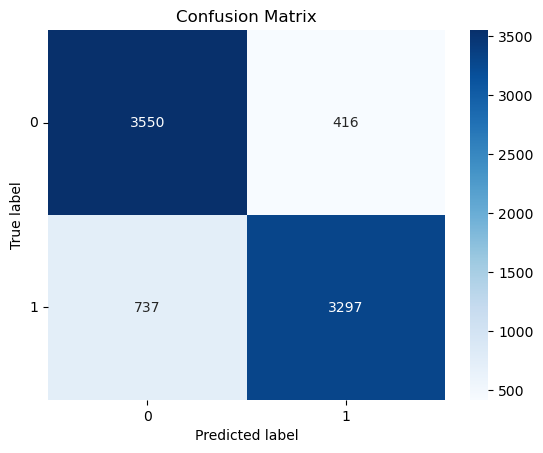

In [31]:
y_pred = model.predict(X_pad_test)
y_pred_binary = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_binary)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.xticks([0.5, 1.5], ['0', '1'])
plt.yticks([0.5, 1.5], ['0', '1'], rotation=0)




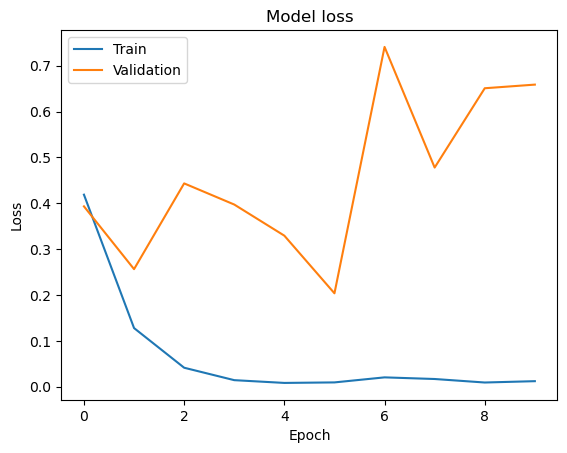

In [32]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Reference
https://towardsdatascience.com/a-beginners-guide-on-sentiment-analysis-with-rnn-9e100627c02e<br>
https://es.code-paper.com/python/examples-python-pandas-remove-punctuationhttps://es.code-paper.com/python/examples-python-pandas-remove-punctuation<br>
https://www.youtube.com/watch?v=WzlujQLA4Oo